### Model Testing

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# Loading the model

model = pickle.load(open('Regression_model.sav', 'rb'))

In [3]:
# Reading the Data
data = pd.read_csv('./static/data/current_bitcoin_data.csv')
data

,Unnamed: 0,Date,High,Low,Mid,Last,Bid,Ask,Volume
0,0,2021-07-13,33337.0,32190.000000,32454.5,32456.000000,32453.0,32456.0,4094.660279
1,1,2021-07-12,34655.0,32600.000000,33036.5,33036.000000,33036.0,33037.0,8260.546142
2,2,2021-07-11,34590.0,33316.000000,34402.5,34406.000000,34401.0,34404.0,2169.860496
3,3,2021-07-10,34242.0,33011.000000,33528.5,33529.000000,33528.0,33529.0,6827.116482
4,4,2021-07-09,34059.0,32237.000000,33927.5,33927.958971,33927.0,33928.0,6183.631326
...,...,...,...,...,...,...,...,...,...
99,99,2021-04-05,59250.0,56850.000000,58895.5,58895.000000,58895.0,58896.0,5428.595234
100,100,2021-04-04,58480.0,56500.000000,58124.5,58124.000000,58124.0,58125.0,5477.169560
101,101,2021-04-03,59841.0,57120.000000,57532.5,57526.000000,57531.0,57534.0,6144.147122
102,102,2021-04-02,60190.0,58327.986894,58824.5,58825.000000,58824.0,58825.0,6104.000059


In [4]:
# Sorting the data by 'Date' in ascending order

data_sorted = data.sort_values(by='Date', ascending=True)
data_sorted

,Unnamed: 0,Date,High,Low,Mid,Last,Bid,Ask,Volume
103,103,2021-04-01,59483.0,57955.000000,58897.5,58911.000000,58895.0,58900.0,4425.964369
102,102,2021-04-02,60190.0,58327.986894,58824.5,58825.000000,58824.0,58825.0,6104.000059
101,101,2021-04-03,59841.0,57120.000000,57532.5,57526.000000,57531.0,57534.0,6144.147122
100,100,2021-04-04,58480.0,56500.000000,58124.5,58124.000000,58124.0,58125.0,5477.169560
99,99,2021-04-05,59250.0,56850.000000,58895.5,58895.000000,58895.0,58896.0,5428.595234
...,...,...,...,...,...,...,...,...,...
4,4,2021-07-09,34059.0,32237.000000,33927.5,33927.958971,33927.0,33928.0,6183.631326
3,3,2021-07-10,34242.0,33011.000000,33528.5,33529.000000,33528.0,33529.0,6827.116482
2,2,2021-07-11,34590.0,33316.000000,34402.5,34406.000000,34401.0,34404.0,2169.860496
1,1,2021-07-12,34655.0,32600.000000,33036.5,33036.000000,33036.0,33037.0,8260.546142


In [5]:
# Rename the Closing price column

data_sorted = data_sorted.rename(columns={'Last':'Close'})
data_sorted.head()

,Unnamed: 0,Date,High,Low,Mid,Close,Bid,Ask,Volume
103,103,2021-04-01,59483.0,57955.000000,58897.5,58911.0,58895.0,58900.0,4425.964369
102,102,2021-04-02,60190.0,58327.986894,58824.5,58825.0,58824.0,58825.0,6104.000059
101,101,2021-04-03,59841.0,57120.000000,57532.5,57526.0,57531.0,57534.0,6144.147122
100,100,2021-04-04,58480.0,56500.000000,58124.5,58124.0,58124.0,58125.0,5477.169560
99,99,2021-04-05,59250.0,56850.000000,58895.5,58895.0,58895.0,58896.0,5428.595234


In [6]:
# Assign X (data) and y (target)

X = data_sorted[['High', 'Low', 'Volume']]
y = data_sorted['Close'].values.reshape(-1,1)

print(X.shape, y.shape)

(104, 3) (104, 1)


In [10]:
# Make predictions and compare the actual values with the predicted values

predictions = model.predict(X)
results_df = pd.DataFrame(list(zip(y, predictions)))
results_df.columns=['Actual', 'Predicted']
results_df.head()

,Actual,Predicted
0,[58911.0],[58742.250183937096]
1,[58825.0],[59286.03823936182]
2,[57526.0],[58526.06076846204]
3,[58124.0],[57520.90099561818]
4,[58895.0],[58090.08121882928]


In [11]:
# Create a column 'EMA' to show exponential moving average for the closing values

results_df['EMA'] = results_df.iloc[:,0].ewm(span=40,adjust=False).mean()
results_df.head()

,Actual,Predicted,EMA
0,[58911.0],[58742.250183937096],58911.000000
1,[58825.0],[59286.03823936182],58906.804878
2,[57526.0],[58526.06076846204],58839.448543
3,[58124.0],[57520.90099561818],58804.548614
4,[58895.0],[58090.08121882928],58808.960876


In [12]:
# Create a column 'SMA_15' to show a 15-day simple moving average for the predicted values

results_df['SMA_15'] = results_df.iloc[:,0].rolling(window=15).mean()
results_df.head()

,Actual,Predicted,EMA,SMA_15
0,[58911.0],[58742.250183937096],58911.000000,NaN
1,[58825.0],[59286.03823936182],58906.804878,NaN
2,[57526.0],[58526.06076846204],58839.448543,NaN
3,[58124.0],[57520.90099561818],58804.548614,NaN
4,[58895.0],[58090.08121882928],58808.960876,NaN


In [13]:
# Create a column 'SMA_30' to show a 30-day simple moving average for the predicted values

results_df['SMA_30'] = results_df.iloc[:,0].rolling(window=30).mean()
results_df.head()

,Actual,Predicted,EMA,SMA_15,SMA_30
0,[58911.0],[58742.250183937096],58911.000000,NaN,NaN
1,[58825.0],[59286.03823936182],58906.804878,NaN,NaN
2,[57526.0],[58526.06076846204],58839.448543,NaN,NaN
3,[58124.0],[57520.90099561818],58804.548614,NaN,NaN
4,[58895.0],[58090.08121882928],58808.960876,NaN,NaN


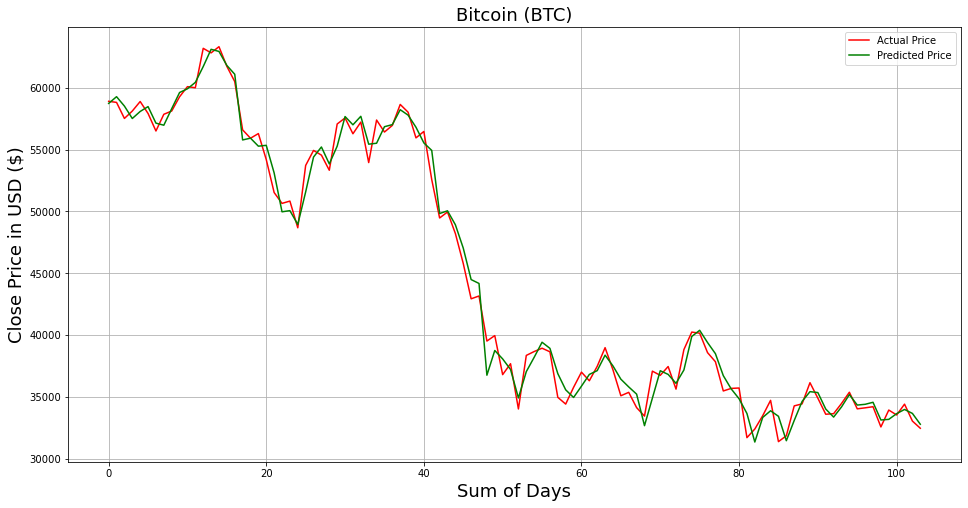

In [14]:
# Plot the Actual and Predicted values on a line chart

plt.figure(figsize=(16,8))
plt.title('Bitcoin (BTC)', fontsize = 18)
plt.xlabel('Sum of Days', fontsize= 18)
plt.ylabel('Close Price in USD ($)', fontsize = 18)
plt.plot(results_df['Actual'], c='red', label='Actual Price')
plt.plot(results_df['Predicted'], c='green', label='Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

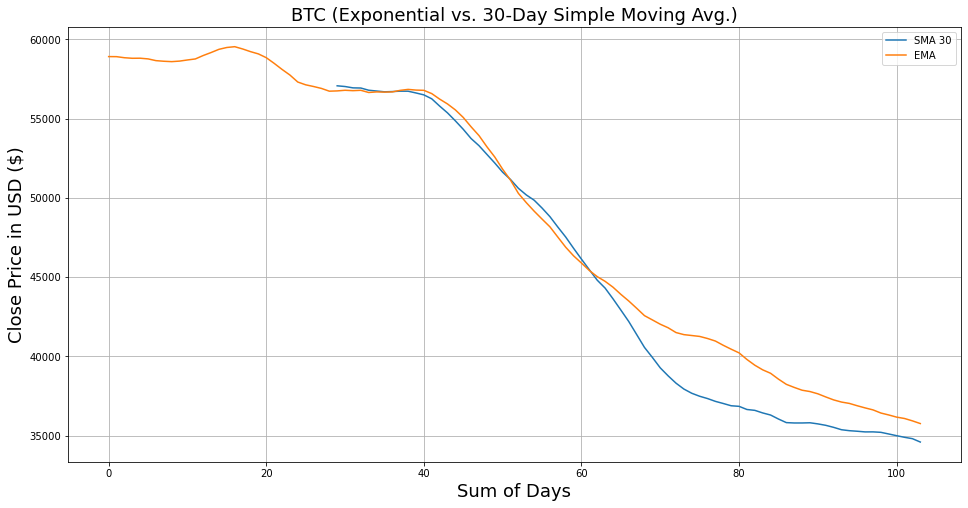

In [15]:
# Plot the 30-Day simple moving average and the exponential moving average on a line chart

plt.figure(figsize=(16,8))
plt.title('BTC (Exponential vs. 30-Day Simple Moving Avg.)', fontsize = 18)
plt.xlabel('Sum of Days', fontsize= 18)
plt.ylabel('Close Price in USD ($)', fontsize = 18)
# plt.plot(results_df['SMA_15'],label='SMA 15')
plt.plot(results_df['SMA_30'],label='SMA 30')
plt.plot(results_df['EMA'],label='EMA')
plt.legend()
plt.grid(True)
plt.show()